# 1. Import the required liberaries and data file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
#Import data set
df_sr = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)

In [3]:
df_sr.replace('Unspecified',np.NaN,inplace=True)

In [4]:
df_sr.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

In [6]:
df_sr.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
r_columns= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

In [8]:
df_sr.drop(r_columns, inplace=True, axis=1)
df_sr = df_sr[df_sr['Status']=='Closed']
df_sr.drop(['Status'], inplace=True, axis=1)
df_sr = df_sr[(df_sr['Latitude'].notnull())& (df_sr['Longitude'].notnull()) & (df_sr['Descriptor'].notnull())]

In [9]:
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
Unique Key                291204 non-null int64
Created Date              291204 non-null object
Closed Date               291204 non-null object
Agency                    291204 non-null object
Complaint Type            291204 non-null object
Descriptor                291204 non-null object
Location Type             291149 non-null object
Incident Zip              291164 non-null float64
City                      291164 non-null object
Resolution Description    291204 non-null object
Borough                   291204 non-null object
Latitude                  291204 non-null float64
Longitude                 291204 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 31.1+ MB


In [10]:
df_sr.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


# 2. Read or convert the columns

In [11]:
df_sr['Created Date'] = df_sr['Created Date'].astype('datetime64[ns]')
df_sr['Closed Date'] = df_sr['Closed Date'].astype('datetime64[ns]')
df_sr[['Created Date', 'Closed Date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 2 columns):
Created Date    291204 non-null datetime64[ns]
Closed Date     291204 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 6.7 MB


In [12]:
df_sr['RequestClosingTime'] = df_sr['Closed Date'] - df_sr['Created Date']

In [13]:
df_sr.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'RequestClosingTime'],
      dtype='object')

In [14]:
df_sr.all()

Unique Key                True
Created Date              True
Closed Date               True
Agency                    True
Complaint Type            True
Descriptor                True
Location Type             True
Incident Zip              True
City                      True
Resolution Description    True
Borough                   True
Latitude                  True
Longitude                 True
RequestClosingTime        True
dtype: bool

In [15]:
df_sr.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude,RequestClosingTime
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,03:27:02


# 3. Data Analysis and Visualization Graphs and Tables

In [16]:
df_sr['Agency'].value_counts()

NYPD    291204
Name: Agency, dtype: int64

In [17]:
print('Start from : ',min(df_sr['Created Date']))
print('Till : ',max(df_sr['Created Date']))

Start from :  2015-03-29 00:33:01
Till :  2015-12-31 23:59:45


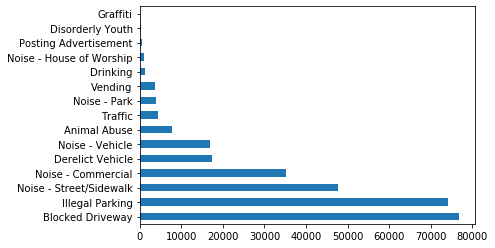

In [18]:
df_sr['Complaint Type'].value_counts().plot(kind='barh')

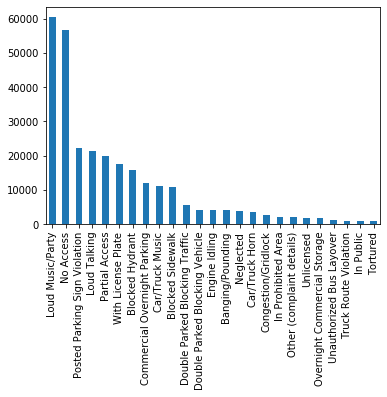

In [19]:
df_sr['Descriptor'].value_counts()[:25].plot(kind='bar')

In [20]:
top6_complaints = ['Blocked Driveway','Illegal Parking','Noise - Commercial','Noise - Street/Sidewalk','Derelict Vehicle','Animal Abuse']
comp_borough = df_sr.groupby(['Borough','Complaint Type']).size().unstack()
comp_borough = comp_borough[top6_complaints]
comp_borough

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Animal Abuse
Borough,,,,,,
BRONX,12741,7831,2431,8864,1949,1413
BROOKLYN,28128,27394,11452,13316,5167,2390
MANHATTAN,2057,11983,14540,20383,530,1511
QUEENS,31630,21951,6058,4392,8102,1874
STATEN ISLAND,2141,4883,678,816,1763,557


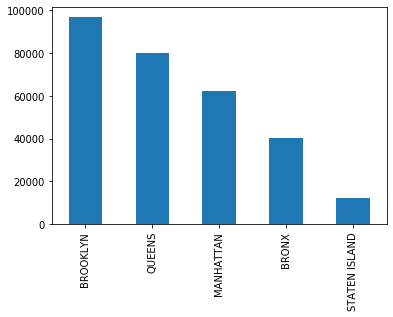

In [21]:
df_sr['Borough'].value_counts().plot(kind='bar')

In [22]:
citywise_complaints = pd.DataFrame(df_sr['City'].value_counts()[:10])

In [23]:
import squarify

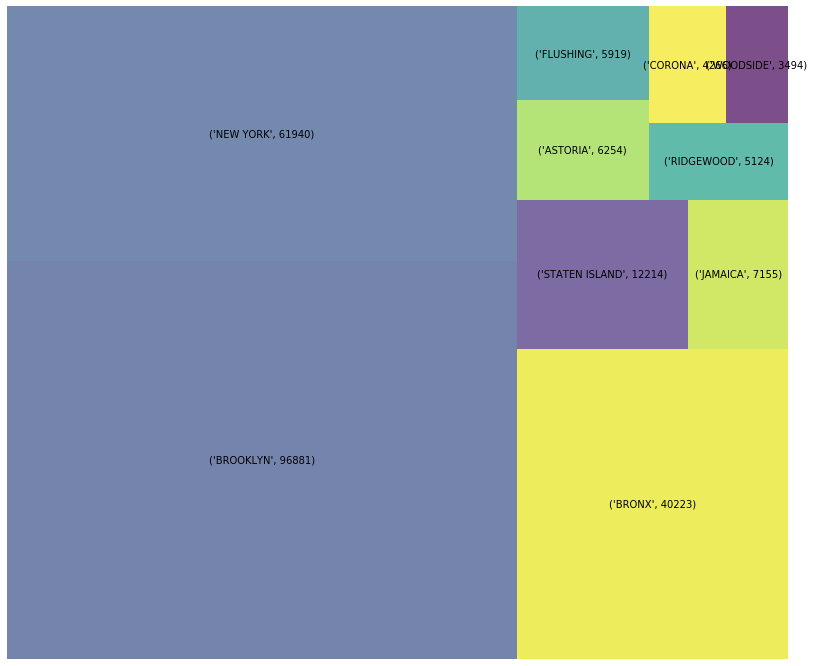

In [24]:
fig = plt.gcf()
fig.set_size_inches(14, 12)
label=zip(list(citywise_complaints.index),citywise_complaints['City'])
squarify.plot(sizes=citywise_complaints['City'], label=label, alpha=0.7)
plt.axis('off')
plt.show()

In [25]:
df_sr['RequestClosingTime'].describe()

count                    291204
mean     0 days 04:18:30.611983
std      0 days 06:03:42.643823
min             0 days 00:01:00
25%             0 days 01:16:30
50%             0 days 02:42:38
75%             0 days 05:20:23
max            24 days 16:52:22
Name: RequestClosingTime, dtype: object

In [26]:
df_sr['RequestClosingHours'] = df_sr['RequestClosingTime'].astype('timedelta64[h]')+1
df_sr[['RequestClosingTime','RequestClosingHours']].head()

,RequestClosingTime,RequestClosingHours
0,00:55:15,1.0
1,01:26:16,2.0
2,04:51:31,5.0
3,07:45:14,8.0
4,03:27:02,4.0


In [27]:
mean = df_sr['RequestClosingHours'].mean()
std = df_sr['RequestClosingHours'].std()

print('Mean: ',mean)
print('Std: ',std)

Mean:  4.818282029093007
Std:  6.0636246344163185


In [28]:
df_sr['RequestClosingHours'].sort_values().tail()

12167     224.0
12168     224.0
21268     520.0
23664     578.0
244488    593.0
Name: RequestClosingHours, dtype: float64

In [29]:
dataplot = df_sr[ ((df_sr['RequestClosingHours']-mean)/std) < 1]

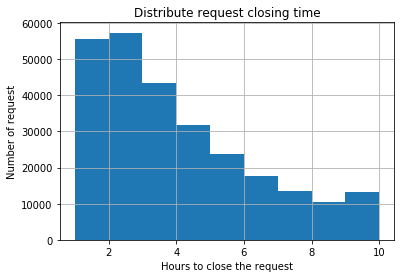

In [30]:
dataplot['RequestClosingHours'].hist(bins=9)
plt.xlabel('Hours to close the request')
plt.ylabel('Number of request')
plt.title('Distribute request closing time')
plt.show()

#  4. Average Request Closing Time

In [31]:
import datetime
df_sr['YYYY-MM'] = df_sr['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

In [32]:
df_sr.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude,RequestClosingTime,RequestClosingHours,YYYY-MM
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,00:55:15,1.0,2015-12
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,01:26:16,2.0,2015-12
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,04:51:31,5.0,2015-12
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,07:45:14,8.0,2015-12
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,03:27:02,4.0,2015-12


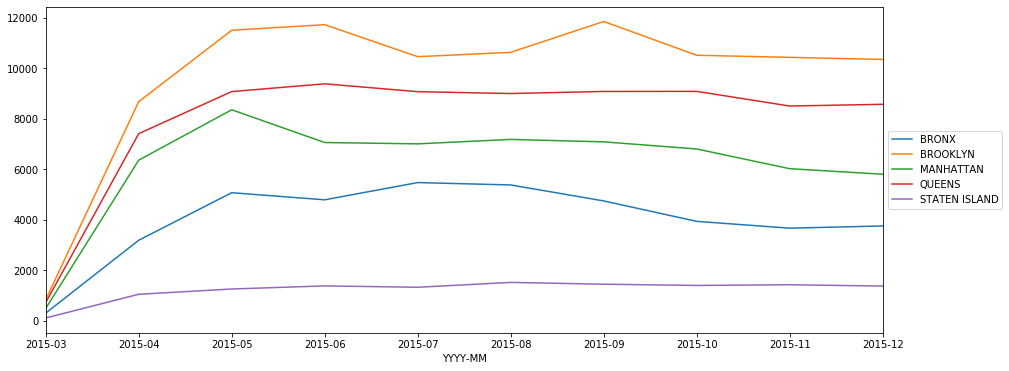

In [33]:
# Complaints per Borough through the year
df_sr.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

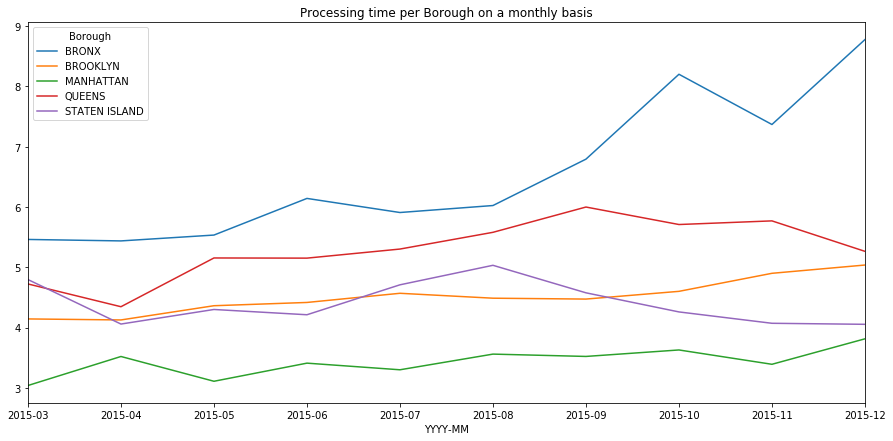

In [34]:
df_sr.groupby(['YYYY-MM','Borough'])['RequestClosingHours'].mean().unstack().plot(figsize=(15,7), title='Processing time per Borough on a monthly basis');

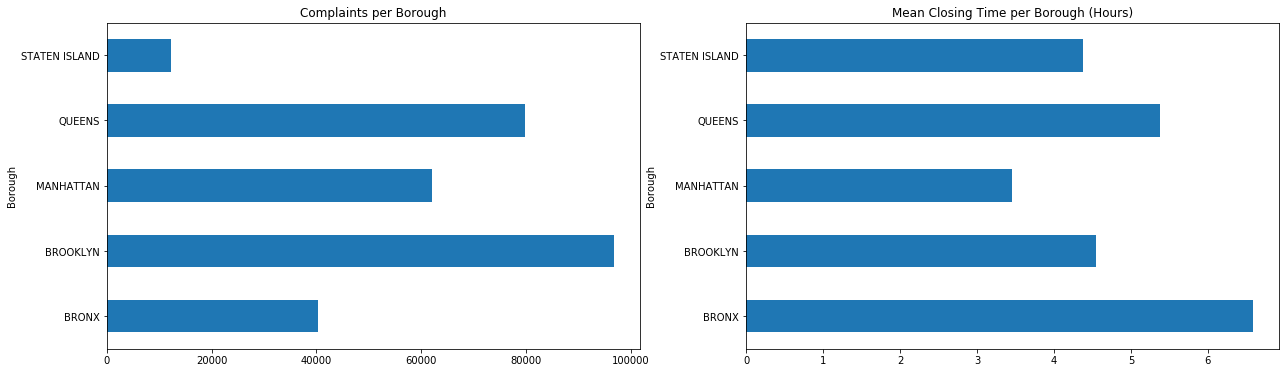

In [35]:
fig = plt.figure(figsize=(21,6))
plt.subplot(1, 2, 1)
df_sr.groupby('Borough')['Unique Key'].size().plot(kind='barh',title='Complaints per Borough');

plt.subplot(1, 2, 2)
df_sr.groupby('Borough')['RequestClosingHours'].mean().plot(kind='barh',title='Mean Closing Time per Borough (Hours)');
plt.show()

# 5. Hypothesis testing

# 1. Whether the average response time across complaint types is similar or not (overall)

- First we will convert our hourly timedelta into minuted for more precise results.
- Below is the distribution of our RequestClosingMinutes data for 'Noise - Street/Sidewalk' complaint type.
- We see a positive skewness in data if we limit the range to 1250
- As our data contains too many outliers , hence we will transform the data using log transformation

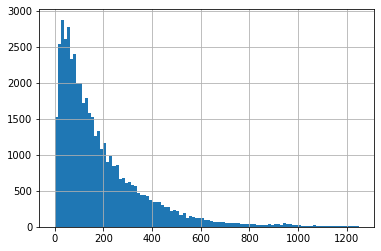

In [36]:
df_sr['RequestClosingMinutes'] = df_sr['RequestClosingTime'].astype('timedelta64[m]')+1

original = df_sr[df_sr['Complaint Type']=='Noise - Street/Sidewalk']['RequestClosingMinutes']
original.hist(bins=100,range=(0,1250))

In [37]:
original.describe()

count    47771.000000
mean       207.218647
std        327.125227
min          3.000000
25%         61.000000
50%        133.000000
75%        259.000000
max      35573.000000
Name: RequestClosingMinutes, dtype: float64

In [40]:
data = {}
for complaint in df_sr['Complaint Type'].unique():
    data[complaint] = np.log(df_sr[df_sr['Complaint Type']==complaint]['RequestClosingMinutes'])

In [42]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

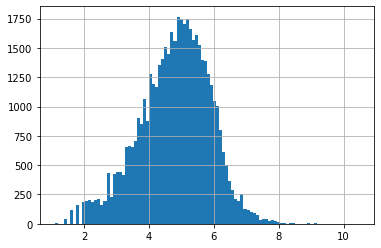

In [43]:
data['Noise - Street/Sidewalk'].hist(bins=100)

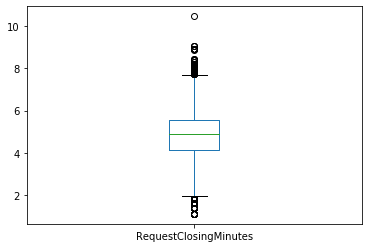

In [45]:
data['Noise - Street/Sidewalk'].plot(kind='box')

# 2. Are the type of complaint or service requested and location related?

In [46]:
df_sr.describe()

,Unique Key,Incident Zip,Latitude,Longitude,RequestClosingTime,RequestClosingHours,RequestClosingMinutes
count,2.912040e+05,291164.000000,291204.000000,291204.000000,291204,291204.000000,291204.000000
mean,3.130155e+07,10858.006429,40.725678,-73.925041,0 days 04:18:30.611983,4.818282,259.205832
std,5.753065e+05,580.264882,0.082407,0.078658,0 days 06:03:42.643823,6.063625,363.706582
min,3.027948e+07,83.000000,40.499135,-74.254937,0 days 00:01:00,1.000000,2.000000
25%,3.079944e+07,10314.000000,40.668933,-73.970993,0 days 01:16:30,2.000000,77.000000
50%,3.130665e+07,11209.000000,40.717768,-73.930774,0 days 02:42:38,3.000000,163.000000
75%,3.179086e+07,11238.000000,40.782968,-73.875788,0 days 05:20:23,6.000000,321.000000
max,3.231065e+07,11697.000000,40.912869,-73.700760,24 days 16:52:22,593.000000,35573.000000


In [61]:
df_slr = df_sr[['Complaint Type','Borough','Longitude','Latitude','City']]

- First we will convert the categorical data to numerical data by mapping the category to category codes

In [62]:
df_slr['Complaint Type'] = df_slr['Complaint Type'].astype('category')
df_slr['Borough'] = df_slr['Borough'].astype('category')
df_slr['City'] = df_slr['City'].astype('category')

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [63]:
df_slr.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,Noise - Street/Sidewalk,MANHATTAN,-73.923501,40.865682,NEW YORK
1,Blocked Driveway,QUEENS,-73.915094,40.775945,ASTORIA
2,Blocked Driveway,BRONX,-73.888525,40.870325,BRONX
3,Illegal Parking,BRONX,-73.828379,40.835994,BRONX
4,Illegal Parking,QUEENS,-73.874170,40.733060,ELMHURST


In [65]:
df_slr.corr(method='pearson')

,Longitude,Latitude
Longitude,1.000000,0.368839
Latitude,0.368839,1.000000
